In [1]:
#importar las librerias
import consultas as cst
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import datetime 


In [ ]:
#NUMEROS A EVALUAR
query=f'''
SELECT * FROM TEMP_PROPENSION_RECARGAS_CP
'''


In [4]:
#AL MIRAR A BASE SE VE QUE HAY USUARIOS QUE SALEN 2 Y 3 VECES , ESTO DIFICULTA MUCHO EL ANALISIS AL MOMENTO DE CRUZAR LA INFORMACION ASI QUE 
#PROCEDEMOS PRIMERO SOLO A EVALUAR LA PRIMERA EVALUACION A PARTIR DE UNA PARTICION 
query=f'''
SELECT * FROM (
SELECT  A.*,
        ROW_NUMBER() OVER(PARTITION BY A.SUBSCRIBER_ID ORDER BY A.FECHA_PRED ) AS RN
FROM TEMP_PROPENSION_RECARGAS_CP A)
WHERE RN=1
'''
base_1=cst.consulta(query)

In [ ]:
#PEGAR AAL DWH DE RECARGAS LA INFO DE LA PRIMERA PREDICCION 
query=f'''
SELECT * 
FROM DWH_BODEGA_WOM.FCT_RECARGAS A 
RIGHT JOIN (SELECT * FROM (
SELECT  A.*,
        ROW_NUMBER() OVER(PARTITION BY A.SUBSCRIBER_ID ORDER BY A.FECHA_PRED ) AS RN
FROM TEMP_PROPENSION_RECARGAS_CP A)
WHERE RN=1) B ON A.SUBSCRIBER_ID=B.SUBSCRIBER_ID
WHERE A.FECHA_RECARGA BETWEEN B.FECHA_PRED AND B.RANGO_PREDICHO
'''

In [5]:
#DATOS DE RECARGAS PARA RN=1  ,luego toca pegarle lo otro 
query=f'''
SELECT A.SUBSCRIBER_ID,
       COUNT(*) AS TOTAL_RECARGAS,
       SUM(A.VALOR_CARGA) AS VALOR_RECARGAS,
       SUM(A.VALOR_CARGA)/COUNT(*) AS PROMEDIO_RECARGA,
       1 AS RECARGO
FROM DWH_BODEGA_WOM.FCT_RECARGAS A 
RIGHT JOIN (SELECT * FROM (
SELECT  A.*,
        ROW_NUMBER() OVER(PARTITION BY A.SUBSCRIBER_ID ORDER BY A.FECHA_PRED ) AS RN
FROM TEMP_PROPENSION_RECARGAS_CP A)
WHERE RN=1) B ON A.SUBSCRIBER_ID=B.SUBSCRIBER_ID
WHERE A.FECHA_RECARGA BETWEEN B.FECHA_PRED AND B.RANGO_PREDICHO
GROUP BY A.SUBSCRIBER_ID
'''
recargas_1=cst.consulta(query)

c:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [30]:
recargas_1

,SUBSCRIBER_ID,TOTAL_RECARGAS,VALOR_RECARGAS,PROMEDIO_RECARGA,RECARGO
0,1250635489,1,3500,3500.0,1
1,1237771167,2,9000,4500.0,1
2,1170822162,1,3500,3500.0,1
3,1271119261,1,5500,5500.0,1
4,1284175984,2,7000,3500.0,1
...,...,...,...,...,...
24430,1276203951,1,5500,5500.0,1
24431,1222121581,1,3500,3500.0,1
24432,1234679801,1,5500,5500.0,1
24433,1260423348,1,5500,5500.0,1


In [6]:
df_general_1=base_1.merge(recargas_1,left_on='SUBSCRIBER_ID',right_on='SUBSCRIBER_ID',how='left')

In [7]:
df_general_1=df_general_1.fillna(0)

In [8]:
#carga de base 2 y base 3 
query=f'''
SELECT * FROM (
SELECT  A.*,
        ROW_NUMBER() OVER(PARTITION BY A.SUBSCRIBER_ID ORDER BY A.FECHA_PRED ) AS RN
FROM TEMP_PROPENSION_RECARGAS_CP A)
WHERE RN=2
'''
base_2=cst.consulta(query)

c:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [9]:
query=f'''
SELECT * FROM (
SELECT  A.*,
        ROW_NUMBER() OVER(PARTITION BY A.SUBSCRIBER_ID ORDER BY A.FECHA_PRED ) AS RN
FROM TEMP_PROPENSION_RECARGAS_CP A)
WHERE RN=3
'''
base_3=cst.consulta(query)

c:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [10]:
#carga de recargas 2 y recargas 3 
query=f'''
SELECT A.SUBSCRIBER_ID,
       COUNT(*) AS TOTAL_RECARGAS,
       SUM(A.VALOR_CARGA) AS VALOR_RECARGAS,
       SUM(A.VALOR_CARGA)/COUNT(*) AS PROMEDIO_RECARGA,
       1 AS RECARGO
FROM DWH_BODEGA_WOM.FCT_RECARGAS A 
RIGHT JOIN (SELECT * FROM (
SELECT  A.*,
        ROW_NUMBER() OVER(PARTITION BY A.SUBSCRIBER_ID ORDER BY A.FECHA_PRED ) AS RN
FROM TEMP_PROPENSION_RECARGAS_CP A)
WHERE RN=2) B ON A.SUBSCRIBER_ID=B.SUBSCRIBER_ID
WHERE A.FECHA_RECARGA BETWEEN B.FECHA_PRED AND B.RANGO_PREDICHO
GROUP BY A.SUBSCRIBER_ID
'''
recargas_2=cst.consulta(query)

c:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [11]:
query=f'''
SELECT A.SUBSCRIBER_ID,
       COUNT(*) AS TOTAL_RECARGAS,
       SUM(A.VALOR_CARGA) AS VALOR_RECARGAS,
       SUM(A.VALOR_CARGA)/COUNT(*) AS PROMEDIO_RECARGA,
       1 AS RECARGO
FROM DWH_BODEGA_WOM.FCT_RECARGAS A 
RIGHT JOIN (SELECT * FROM (
SELECT  A.*,
        ROW_NUMBER() OVER(PARTITION BY A.SUBSCRIBER_ID ORDER BY A.FECHA_PRED ) AS RN
FROM TEMP_PROPENSION_RECARGAS_CP A)
WHERE RN=3) B ON A.SUBSCRIBER_ID=B.SUBSCRIBER_ID
WHERE A.FECHA_RECARGA BETWEEN B.FECHA_PRED AND B.RANGO_PREDICHO
GROUP BY A.SUBSCRIBER_ID
'''
recargas_3=cst.consulta(query)

c:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [12]:
#juntar recargas 2 y recargas 3 con us bases y llenar los vacios 
df_general_2=base_2.merge(recargas_2,left_on='SUBSCRIBER_ID',right_on='SUBSCRIBER_ID',how='left')
df_general_3=base_3.merge(recargas_3,left_on='SUBSCRIBER_ID',right_on='SUBSCRIBER_ID',how='left')
df_general_2=df_general_2.fillna(0)
df_general_3=df_general_3.fillna(0)

In [13]:
#PAQUETES 1 
query=f'''
SELECT DISTINCT(A.SUBSCRIBER_ID) AS SUBSCRIBER_ID,
       A.PAQUETE_NOMBRE,
       COUNT(*) AS TOTAL_PAQUETES,
       SUM(A.VALOR) AS VALOR_PAQUETES,
       1 AS PAQUETE
FROM DWH_BODEGA_WOM.FCT_PAQUETES A 
RIGHT JOIN (SELECT * FROM (
SELECT  A.*,
        ROW_NUMBER() OVER(PARTITION BY A.SUBSCRIBER_ID ORDER BY A.FECHA_PRED ) AS RN
FROM TEMP_PROPENSION_RECARGAS_CP A)
WHERE RN=1) B ON A.SUBSCRIBER_ID=B.SUBSCRIBER_ID
WHERE A.FECHA_RECARGA BETWEEN B.FECHA_PRED AND B.RANGO_PREDICHO
GROUP BY A.SUBSCRIBER_ID,A.PAQUETE_NOMBRE
'''
paquetes_1=cst.consulta(query)

c:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [14]:
df_general_1=df_general_1.merge(paquetes_1,left_on='SUBSCRIBER_ID',right_on='SUBSCRIBER_ID',how='left')

In [15]:
df_general_1=df_general_1.fillna(0)

In [17]:
df_general_1

,SUBSCRIBER_ID,PERIODO,DIA_RECARGA,FECHA_PRED,PREDICCION,PROBABILIDAD,VALOR_CARGA,RANGO_PREDICHO,RN,TOTAL_RECARGAS,VALOR_RECARGAS,PROMEDIO_RECARGA,RECARGO,PAQUETE_NOMBRE,TOTAL_PAQUETES,VALOR_PAQUETES,PAQUETE
0,192554318,202212,2022-11-25,2022-12-01,0,31,5500.0,2022-12-05,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,192559679,202211,2022-11-17,2022-11-23,0,23,1001.0,2022-11-27,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,192561164,202212,2022-11-30,2022-12-06,0,0,43000.0,2022-12-10,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,192579830,202212,2022-11-30,2022-12-06,0,9,11000.0,2022-12-10,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
4,1112632454,202212,2022-12-01,2022-12-07,1,74,1000.0,2022-12-11,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96635,2325409522,202212,2022-11-25,2022-12-01,0,2,21000.0,2022-12-05,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
96636,2325434093,202212,2022-11-29,2022-12-05,0,24,3500.0,2022-12-09,1,0.0,0.0,0.0,0.0,Paquete prepago WB APPs_2022,1.0,0.0,1.0
96637,2325678114,202212,2022-11-29,2022-12-05,0,15,1000.0,2022-12-09,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
96638,2326269050,202212,2022-12-01,2022-12-07,0,15,1000.0,2022-12-11,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0


In [16]:
#paquetes 2 y paquetes 3
query=f'''
SELECT DISTINCT(A.SUBSCRIBER_ID) AS SUBSCRIBER_ID,
       A.PAQUETE_NOMBRE,
       COUNT(*) AS TOTAL_PAQUETES,
       SUM(A.VALOR) AS VALOR_PAQUETES,
       1 AS PAQUETE
FROM DWH_BODEGA_WOM.FCT_PAQUETES A 
RIGHT JOIN (SELECT * FROM (
SELECT  A.*,
        ROW_NUMBER() OVER(PARTITION BY A.SUBSCRIBER_ID ORDER BY A.FECHA_PRED ) AS RN
FROM TEMP_PROPENSION_RECARGAS_CP A)
WHERE RN=2) B ON A.SUBSCRIBER_ID=B.SUBSCRIBER_ID
WHERE A.FECHA_RECARGA BETWEEN B.FECHA_PRED AND B.RANGO_PREDICHO
GROUP BY A.SUBSCRIBER_ID,A.PAQUETE_NOMBRE
'''
paquetes_2=cst.consulta(query)

c:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [17]:
query=f'''
SELECT DISTINCT(A.SUBSCRIBER_ID) AS SUBSCRIBER_ID,
       A.PAQUETE_NOMBRE,
       COUNT(*) AS TOTAL_PAQUETES,
       SUM(A.VALOR) AS VALOR_PAQUETES,
       1 AS PAQUETE
FROM DWH_BODEGA_WOM.FCT_PAQUETES A 
RIGHT JOIN (SELECT * FROM (
SELECT  A.*,
        ROW_NUMBER() OVER(PARTITION BY A.SUBSCRIBER_ID ORDER BY A.FECHA_PRED ) AS RN
FROM TEMP_PROPENSION_RECARGAS_CP A)
WHERE RN=3) B ON A.SUBSCRIBER_ID=B.SUBSCRIBER_ID
WHERE A.FECHA_RECARGA BETWEEN B.FECHA_PRED AND B.RANGO_PREDICHO
GROUP BY A.SUBSCRIBER_ID,A.PAQUETE_NOMBRE
'''
paquetes_3=cst.consulta(query)

c:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [18]:
#juntar paquetes 2 y paquetes 3
df_general_2=df_general_2.merge(paquetes_2,left_on='SUBSCRIBER_ID',right_on='SUBSCRIBER_ID',how='left')
df_general_3=df_general_3.merge(paquetes_3,left_on='SUBSCRIBER_ID',right_on='SUBSCRIBER_ID',how='left')
df_general_2=df_general_2.fillna(0)
df_general_3=df_general_3.fillna(0)

In [19]:
#agregar prox recarga fecha y valor 
query=f'''
SELECT SUBSCRIBER_ID,
        PROX_RECARGA,
        MONTO_PROX 
FROM (
SELECT A.SUBSCRIBER_ID,
       A.FECHA_RECARGA AS PROX_RECARGA, 
       A.VALOR_CARGA AS MONTO_PROX,
       ROW_NUMBER() OVER(PARTITION BY A.SUBSCRIBER_ID ORDER BY A.FECHA_RECARGA ) AS RB
FROM DWH_BODEGA_WOM.FCT_RECARGAS A 
RIGHT JOIN (SELECT * FROM (
SELECT  A.*,
        ROW_NUMBER() OVER(PARTITION BY A.SUBSCRIBER_ID ORDER BY A.FECHA_PRED ) AS RN
FROM TEMP_PROPENSION_RECARGAS_CP A) B
WHERE RN=1) B ON A.SUBSCRIBER_ID=B.SUBSCRIBER_ID
WHERE A.FECHA_RECARGA >= B.FECHA_PRED )
WHERE RB=1
'''
prox_recarga_1=cst.consulta(query)

c:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [20]:
query=f'''
SELECT SUBSCRIBER_ID,
        PROX_RECARGA,
        MONTO_PROX 
FROM (
SELECT A.SUBSCRIBER_ID,
       A.FECHA_RECARGA AS PROX_RECARGA, 
       A.VALOR_CARGA AS MONTO_PROX,
       ROW_NUMBER() OVER(PARTITION BY A.SUBSCRIBER_ID ORDER BY A.FECHA_RECARGA ) AS RB
FROM DWH_BODEGA_WOM.FCT_RECARGAS A 
RIGHT JOIN (SELECT * FROM (
SELECT  A.*,
        ROW_NUMBER() OVER(PARTITION BY A.SUBSCRIBER_ID ORDER BY A.FECHA_PRED ) AS RN
FROM TEMP_PROPENSION_RECARGAS_CP A) B
WHERE RN=2) B ON A.SUBSCRIBER_ID=B.SUBSCRIBER_ID
WHERE A.FECHA_RECARGA >= B.FECHA_PRED )
WHERE RB=1
'''
prox_recarga_2=cst.consulta(query)

c:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [21]:
query=f'''
SELECT SUBSCRIBER_ID,
        PROX_RECARGA,
        MONTO_PROX 
FROM (
SELECT A.SUBSCRIBER_ID,
       A.FECHA_RECARGA AS PROX_RECARGA, 
       A.VALOR_CARGA AS MONTO_PROX,
       ROW_NUMBER() OVER(PARTITION BY A.SUBSCRIBER_ID ORDER BY A.FECHA_RECARGA ) AS RB
FROM DWH_BODEGA_WOM.FCT_RECARGAS A 
RIGHT JOIN (SELECT * FROM (
SELECT  A.*,
        ROW_NUMBER() OVER(PARTITION BY A.SUBSCRIBER_ID ORDER BY A.FECHA_PRED ) AS RN
FROM TEMP_PROPENSION_RECARGAS_CP A) B
WHERE RN=3) B ON A.SUBSCRIBER_ID=B.SUBSCRIBER_ID
WHERE A.FECHA_RECARGA >= B.FECHA_PRED )
WHERE RB=1
'''
prox_recarga_3=cst.consulta(query)

c:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [22]:
df_general_1=df_general_1.merge(prox_recarga_1,left_on='SUBSCRIBER_ID',right_on='SUBSCRIBER_ID',how='left')
df_general_2=df_general_2.merge(prox_recarga_2,left_on='SUBSCRIBER_ID',right_on='SUBSCRIBER_ID',how='left')
df_general_3=df_general_3.merge(prox_recarga_3,left_on='SUBSCRIBER_ID',right_on='SUBSCRIBER_ID',how='left')
df_general_1=df_general_1.fillna(0)
df_general_2=df_general_2.fillna(0)
df_general_3=df_general_3.fillna(0)

In [23]:
resultado=pd.concat([df_general_1,df_general_2,df_general_3])

In [22]:
resultado

,SUBSCRIBER_ID,PERIODO,DIA_RECARGA,FECHA_PRED,PREDICCION,PROBABILIDAD,VALOR_CARGA,RANGO_PREDICHO,RN,TOTAL_RECARGAS,VALOR_RECARGAS,PROMEDIO_RECARGA,RECARGO,PAQUETE_NOMBRE,TOTAL_PAQUETES,VALOR_PAQUETES,PAQUETE,PROX_RECARGA,MONTO_PROX
0,192554318,202212,2022-11-25,2022-12-01,0,31,5500.0,2022-12-05,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,2022-12-12 14:14:57,21000.0
1,192559679,202211,2022-11-17,2022-11-23,0,23,1001.0,2022-11-27,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0
2,192561164,202212,2022-11-30,2022-12-06,0,0,43000.0,2022-12-10,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0
3,192579830,202212,2022-11-30,2022-12-06,0,9,11000.0,2022-12-10,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0
4,1112632454,202212,2022-12-01,2022-12-07,1,74,1000.0,2022-12-11,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2281055991,202212,2022-12-01,2022-12-07,1,54,5500.0,2022-12-11,3,1.0,5500.0,5500.0,1.0,MIXTO_Paquete 7D _1.5GB,1.0,5500.0,1.0,2022-12-08 14:54:43,5500.0
644,2283975275,202212,2022-12-01,2022-12-07,1,54,11000.0,2022-12-11,3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0
645,2291799564,202212,2022-12-01,2022-12-07,0,14,7500.0,2022-12-11,3,1.0,7500.0,7500.0,1.0,MIXTO_Paquete 10D _2.5GB,1.0,7500.0,1.0,2022-12-08 23:53:12,7500.0
646,2295178839,202212,2022-12-01,2022-12-07,0,6,11000.0,2022-12-11,3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0


In [82]:
df_fn.columns

Index(['SUBSCRIBER_ID', 'PERIODO', 'DIA_RECARGA', 'FECHA_PRED', 'PREDICCION',
       'PROBABILIDAD', 'VALOR_CARGA', 'RANGO_PREDICHO', 'RN', 'TOTAL_RECARGAS',
       'VALOR_RECARGAS', 'PROMEDIO_RECARGA', 'RECARGO', 'PAQUETE_NOMBRE',
       'TOTAL_PAQUETES', 'VALOR_PAQUETES', 'PAQUETE', 'PROX_RECARGA',
       'MONTO_PROX', 'DIAS_ENTRE_RECARGAS'],
      dtype='object')

In [24]:
resultado['PROX_RECARGA'].replace(0,datetime.datetime.now()+datetime.timedelta(-10000),inplace=True)

In [25]:
resultado['PROX_RECARGA']=resultado['PROX_RECARGA'].apply(lambda x : pd.to_datetime(x))

In [26]:
resultado['DIAS_ENTRE_RECARGAS']=resultado['PROX_RECARGA']-resultado['FECHA_PRED']

In [27]:
resultado['DIAS_ENTRE_RECARGAS'] = pd.to_numeric(resultado['DIAS_ENTRE_RECARGAS'].dt.days, downcast='integer')

In [40]:
resultado

,SUBSCRIBER_ID,PERIODO,DIA_RECARGA,FECHA_PRED,PREDICCION,PROBABILIDAD,VALOR_CARGA,RANGO_PREDICHO,RN,TOTAL_RECARGAS,VALOR_RECARGAS,PROMEDIO_RECARGA,RECARGO,PAQUETE_NOMBRE,TOTAL_PAQUETES,VALOR_PAQUETES,PAQUETE,PROX_RECARGA,MONTO_PROX,DIAS_ENTRE_RECARGAS
0,192554318,202212,2022-11-25,2022-12-01,0,31,5500.0,2022-12-05,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,2022-12-12 14:14:57.000000,21000.0,11
1,192559679,202211,2022-11-17,2022-11-23,0,23,1001.0,2022-11-27,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1995-07-29 10:58:43.691236,0.0,-9979
2,192561164,202212,2022-11-30,2022-12-06,0,0,43000.0,2022-12-10,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1995-07-29 10:58:43.691236,0.0,-9992
3,192579830,202212,2022-11-30,2022-12-06,0,9,11000.0,2022-12-10,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1995-07-29 10:58:43.691236,0.0,-9992
4,1112632454,202212,2022-12-01,2022-12-07,1,74,1000.0,2022-12-11,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1995-07-29 10:58:43.691236,0.0,-9993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2281055991,202212,2022-12-01,2022-12-07,1,54,5500.0,2022-12-11,3,1.0,5500.0,5500.0,1.0,MIXTO_Paquete 7D _1.5GB,1.0,5500.0,1.0,2022-12-08 14:54:43.000000,5500.0,1
644,2283975275,202212,2022-12-01,2022-12-07,1,54,11000.0,2022-12-11,3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1995-07-29 10:58:43.691236,0.0,-9993
645,2291799564,202212,2022-12-01,2022-12-07,0,14,7500.0,2022-12-11,3,1.0,7500.0,7500.0,1.0,MIXTO_Paquete 10D _2.5GB,1.0,7500.0,1.0,2022-12-08 23:53:12.000000,7500.0,1
646,2295178839,202212,2022-12-01,2022-12-07,0,6,11000.0,2022-12-11,3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1995-07-29 10:58:43.691236,0.0,-9993


In [41]:
resultado.to_excel('propension_recargas.xlsx')

In [1]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [29]:
y_test=resultado['RECARGO']
y_pred=resultado['PREDICCION']


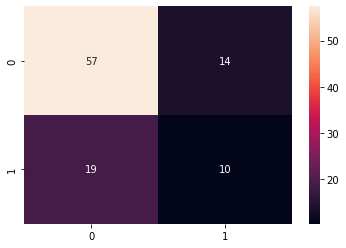

In [30]:
sns.heatmap(confusion_matrix(y_test, y_pred)/len(y_test)*100, annot=True)
plt.show()

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.81      0.78     78215
         1.0       0.43      0.35      0.39     31858

    accuracy                           0.68    110073
   macro avg       0.59      0.58      0.58    110073
weighted avg       0.66      0.68      0.67    110073



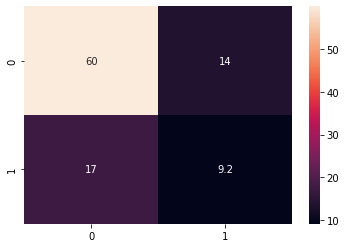

In [38]:
y_test=df_general_1['RECARGO']
y_pred=df_general_1['PREDICCION']
sns.heatmap(confusion_matrix(y_test, y_pred)/len(y_test)*100, annot=True)
plt.show()

In [42]:
resultado.groupby('DIAS_ENTRE_RECARGAS').count()

,SUBSCRIBER_ID,PERIODO,DIA_RECARGA,FECHA_PRED,PREDICCION,PROBABILIDAD,VALOR_CARGA,RANGO_PREDICHO,RN,TOTAL_RECARGAS,VALOR_RECARGAS,PROMEDIO_RECARGA,RECARGO,PAQUETE_NOMBRE,TOTAL_PAQUETES,VALOR_PAQUETES,PAQUETE,PROX_RECARGA,MONTO_PROX
DIAS_ENTRE_RECARGAS,,,,,,,,,,,,,,,,,,,
-9993,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976
-9992,7536,7536,7536,7536,7536,7536,7536,7536,7536,7536,7536,7536,7536,7536,7536,7536,7536,7536,7536
-9991,4633,4633,4633,4633,4633,4633,4633,4633,4633,4633,4633,4633,4633,4633,4633,4633,4633,4633,4633
-9990,5488,5488,5488,5488,5488,5488,5488,5488,5488,5488,5488,5488,5488,5488,5488,5488,5488,5488,5488
-9989,4389,4389,4389,4389,4389,4389,4389,4389,4389,4389,4389,4389,4389,4389,4389,4389,4389,4389,4389
-9988,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208
-9987,4060,4060,4060,4060,4060,4060,4060,4060,4060,4060,4060,4060,4060,4060,4060,4060,4060,4060,4060
-9986,3812,3812,3812,3812,3812,3812,3812,3812,3812,3812,3812,3812,3812,3812,3812,3812,3812,3812,3812
-9985,3609,3609,3609,3609,3609,3609,3609,3609,3609,3609,3609,3609,3609,3609,3609,3609,3609,3609,3609


In [32]:
dias_entre_recargas=resultado[resultado['DIAS_ENTRE_RECARGAS'] >=0]

In [33]:
dias_entre_recargas.count()/resultado.count()

SUBSCRIBER_ID          0.573292
PERIODO                0.573292
DIA_RECARGA            0.573292
FECHA_PRED             0.573292
PREDICCION             0.573292
PROBABILIDAD           0.573292
VALOR_CARGA            0.573292
RANGO_PREDICHO         0.573292
RN                     0.573292
TOTAL_RECARGAS         0.573292
VALOR_RECARGAS         0.573292
PROMEDIO_RECARGA       0.573292
RECARGO                0.573292
PAQUETE_NOMBRE         0.573292
TOTAL_PAQUETES         0.573292
VALOR_PAQUETES         0.573292
PAQUETE                0.573292
PROX_RECARGA           0.573292
MONTO_PROX             0.573292
DIAS_ENTRE_RECARGAS    0.573292
dtype: float64

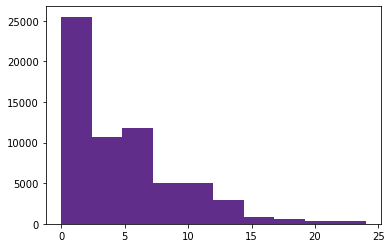

In [34]:

plt.hist(dias_entre_recargas['DIAS_ENTRE_RECARGAS'], color='#612D8A', alpha=1)
plt.show()

In [37]:
recargap1=resultado[(resultado['DIAS_ENTRE_RECARGAS'] >=0) & (resultado['PREDICCION']==1) ]
recargap0=resultado[(resultado['DIAS_ENTRE_RECARGAS'] >=0) & (resultado['PREDICCION']==0) ]
#df_books[(df_books['Year'] > 2016) & (df_books['Genre'] == 'Fiction')]

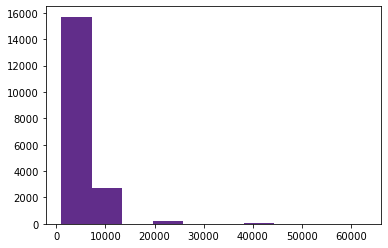

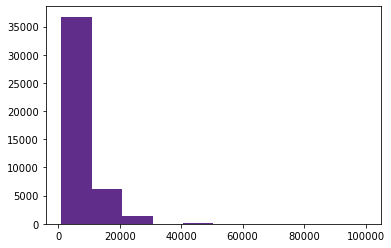

In [39]:
plt.hist(recargap1['MONTO_PROX'], color='#612D8A', alpha=1)
plt.show()
plt.hist(recargap0['MONTO_PROX'], color='#612D8A', alpha=1)
plt.show()

In [46]:
df_tn=resultado[(resultado['RECARGO'] ==0) & (resultado['PREDICCION']==0) ]

In [47]:
df_tn

,SUBSCRIBER_ID,PERIODO,DIA_RECARGA,FECHA_PRED,PREDICCION,PROBABILIDAD,VALOR_CARGA,RANGO_PREDICHO,RN,TOTAL_RECARGAS,VALOR_RECARGAS,PROMEDIO_RECARGA,RECARGO,PAQUETE_NOMBRE,TOTAL_PAQUETES,VALOR_PAQUETES,PAQUETE,PROX_RECARGA,MONTO_PROX,DIAS_ENTRE_RECARGAS
0,192554318,202212,2022-11-25,2022-12-01,0,31,5500.0,2022-12-05,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,2022-12-12 14:14:57.000000,21000.0,11
1,192559679,202211,2022-11-17,2022-11-23,0,23,1001.0,2022-11-27,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1995-07-31 09:42:37.666016,0.0,-9977
2,192561164,202212,2022-11-30,2022-12-06,0,0,43000.0,2022-12-10,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1995-07-31 09:42:37.666016,0.0,-9990
3,192579830,202212,2022-11-30,2022-12-06,0,9,11000.0,2022-12-10,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1995-07-31 09:42:37.666016,0.0,-9990
5,1112632633,202212,2022-11-29,2022-12-05,0,6,5500.0,2022-12-09,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1995-07-31 09:42:37.666016,0.0,-9989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,2211450046,202212,2022-12-01,2022-12-07,0,16,5500.0,2022-12-11,3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1995-07-31 09:42:37.666016,0.0,-9991
633,2227553503,202212,2022-11-30,2022-12-06,0,34,7500.0,2022-12-10,3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1995-07-31 09:42:37.666016,0.0,-9990
634,2235686012,202212,2022-12-01,2022-12-07,0,44,5500.0,2022-12-11,3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,2022-12-12 15:51:26.000000,3500.0,5
640,2261352721,202212,2022-11-30,2022-12-06,0,5,3500.0,2022-12-10,3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1995-07-31 09:42:37.666016,0.0,-9990


In [48]:
dias_entre_recargas=df_tn[df_tn['DIAS_ENTRE_RECARGAS'] >=0]

In [50]:
dias_entre_recargas.count()/df_tn.count()

SUBSCRIBER_ID          0.376279
PERIODO                0.376279
DIA_RECARGA            0.376279
FECHA_PRED             0.376279
PREDICCION             0.376279
PROBABILIDAD           0.376279
VALOR_CARGA            0.376279
RANGO_PREDICHO         0.376279
RN                     0.376279
TOTAL_RECARGAS         0.376279
VALOR_RECARGAS         0.376279
PROMEDIO_RECARGA       0.376279
RECARGO                0.376279
PAQUETE_NOMBRE         0.376279
TOTAL_PAQUETES         0.376279
VALOR_PAQUETES         0.376279
PAQUETE                0.376279
PROX_RECARGA           0.376279
MONTO_PROX             0.376279
DIAS_ENTRE_RECARGAS    0.376279
dtype: float64

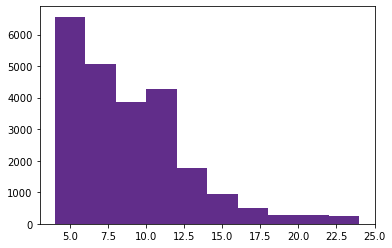

In [51]:

plt.hist(dias_entre_recargas['DIAS_ENTRE_RECARGAS'], color='#612D8A', alpha=1)
plt.show()

In [52]:
df_fn=resultado[(resultado['RECARGO'] ==1) & (resultado['PREDICCION']==0) ]

In [53]:
df_fn

,SUBSCRIBER_ID,PERIODO,DIA_RECARGA,FECHA_PRED,PREDICCION,PROBABILIDAD,VALOR_CARGA,RANGO_PREDICHO,RN,TOTAL_RECARGAS,VALOR_RECARGAS,PROMEDIO_RECARGA,RECARGO,PAQUETE_NOMBRE,TOTAL_PAQUETES,VALOR_PAQUETES,PAQUETE,PROX_RECARGA,MONTO_PROX,DIAS_ENTRE_RECARGAS
24,1112639546,202212,2022-11-25,2022-12-01,0,38,5000.0,2022-12-05,1,1.0,5500.0,5500.0,1.0,MIXTO_Paquete 7D _1.5GB,1.0,5500.0,1.0,2022-12-02 10:19:06,5500.0,1
27,1112639990,202211,2022-11-16,2022-11-22,0,8,0.0,2022-11-26,1,1.0,5500.0,5500.0,1.0,MIXTO_Paquete 7D _1.5GB,1.0,5500.0,1.0,2022-11-24 13:37:17,5500.0,2
29,1112656076,202212,2022-11-25,2022-12-01,0,24,2000.0,2022-12-05,1,1.0,2000.0,2000.0,1.0,Paquete Datos 1D,1.0,1500.0,1.0,2022-12-01 12:00:55,2000.0,0
39,1112658939,202211,2022-11-24,2022-11-30,0,15,7500.0,2022-12-04,1,1.0,7500.0,7500.0,1.0,MIXTO_Paquete 10D _2.5GB,1.0,7500.0,1.0,2022-12-01 17:58:05,7500.0,1
46,1112661971,202211,2022-11-23,2022-11-29,0,8,3500.0,2022-12-03,1,1.0,3500.0,3500.0,1.0,MIXTO_Paquete 3D _500MB,1.0,3500.0,1.0,2022-12-01 09:40:33,3500.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,2253262713,202212,2022-12-01,2022-12-07,0,39,3500.0,2022-12-11,3,1.0,3500.0,3500.0,1.0,MIXTO_Paquete 3D _500MB,1.0,3500.0,1.0,2022-12-08 12:37:43,3500.0,1
641,2268629281,202212,2022-11-30,2022-12-06,0,8,3500.0,2022-12-10,3,1.0,3500.0,3500.0,1.0,MIXTO_Paquete 3D _500MB,1.0,3500.0,1.0,2022-12-09 06:39:07,3500.0,3
642,2271983192,202212,2022-12-01,2022-12-07,0,44,5000.0,2022-12-11,3,1.0,5500.0,5500.0,1.0,MIXTO_Paquete 7D _1.5GB,1.0,5500.0,1.0,2022-12-09 11:50:40,5500.0,2
645,2291799564,202212,2022-12-01,2022-12-07,0,14,7500.0,2022-12-11,3,1.0,7500.0,7500.0,1.0,MIXTO_Paquete 10D _2.5GB,1.0,7500.0,1.0,2022-12-08 23:53:12,7500.0,1


In [54]:
df_fn.groupby('TOTAL_RECARGAS').count()

,SUBSCRIBER_ID,PERIODO,DIA_RECARGA,FECHA_PRED,PREDICCION,PROBABILIDAD,VALOR_CARGA,RANGO_PREDICHO,RN,VALOR_RECARGAS,PROMEDIO_RECARGA,RECARGO,PAQUETE_NOMBRE,TOTAL_PAQUETES,VALOR_PAQUETES,PAQUETE,PROX_RECARGA,MONTO_PROX,DIAS_ENTRE_RECARGAS
TOTAL_RECARGAS,,,,,,,,,,,,,,,,,,,
1.0,18256,18256,18256,18256,18256,18256,18256,18256,18256,18256,18256,18256,18256,18256,18256,18256,18256,18256,18256
2.0,2058,2058,2058,2058,2058,2058,2058,2058,2058,2058,2058,2058,2058,2058,2058,2058,2058,2058,2058
3.0,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243
4.0,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
5.0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
6.0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [56]:
df_fn.groupby('PAQUETE_NOMBRE').count()

,SUBSCRIBER_ID,PERIODO,DIA_RECARGA,FECHA_PRED,PREDICCION,PROBABILIDAD,VALOR_CARGA,RANGO_PREDICHO,RN,TOTAL_RECARGAS,VALOR_RECARGAS,PROMEDIO_RECARGA,RECARGO,TOTAL_PAQUETES,VALOR_PAQUETES,PAQUETE,PROX_RECARGA,MONTO_PROX,DIAS_ENTRE_RECARGAS
PAQUETE_NOMBRE,,,,,,,,,,,,,,,,,,,
0,1595,1595,1595,1595,1595,1595,1595,1595,1595,1595,1595,1595,1595,1595,1595,1595,1595,1595,1595
*Paquete Roaming datos 150 MB,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
MIXTO_Paquete 10D _2.5GB,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521
MIXTO_Paquete 15D _4GB,1566,1566,1566,1566,1566,1566,1566,1566,1566,1566,1566,1566,1566,1566,1566,1566,1566,1566,1566
MIXTO_Paquete 15D _4GB_Dto,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71
MIXTO_Paquete 1D _60MB,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308
MIXTO_Paquete 30D _9GB,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394
MIXTO_Paquete 30DX3 _10GB,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
MIXTO_Paquete 3D _500MB,4022,4022,4022,4022,4022,4022,4022,4022,4022,4022,4022,4022,4022,4022,4022,4022,4022,4022,4022


In [57]:
df_tp=resultado[(resultado['RECARGO'] ==1) & (resultado['PREDICCION']==1) ]

In [58]:
df_tp

,SUBSCRIBER_ID,PERIODO,DIA_RECARGA,FECHA_PRED,PREDICCION,PROBABILIDAD,VALOR_CARGA,RANGO_PREDICHO,RN,TOTAL_RECARGAS,VALOR_RECARGAS,PROMEDIO_RECARGA,RECARGO,PAQUETE_NOMBRE,TOTAL_PAQUETES,VALOR_PAQUETES,PAQUETE,PROX_RECARGA,MONTO_PROX,DIAS_ENTRE_RECARGAS
6,1112633970,202211,2022-11-16,2022-11-22,1,56,0.0,2022-11-26,1,1.0,5500.0,5500.0,1.0,MIXTO_Paquete 7D _1.5GB,1.0,5500.0,1.0,2022-11-22 09:13:56,5500.0,0
21,1112638611,202211,2022-11-17,2022-11-23,1,72,5000.0,2022-11-27,1,1.0,5500.0,5500.0,1.0,MIXTO_Paquete 7D _1.5GB,1.0,5500.0,1.0,2022-11-23 11:21:25,5500.0,0
22,1112639044,202211,2022-11-16,2022-11-22,1,56,0.0,2022-11-26,1,1.0,7500.0,7500.0,1.0,MIXTO_Paquete 10D _2.5GB,1.0,7500.0,1.0,2022-11-23 18:28:15,7500.0,1
32,1112656683,202212,2022-11-27,2022-12-03,1,78,5500.0,2022-12-07,1,1.0,5500.0,5500.0,1.0,MIXTO_Paquete 7D _1.5GB,1.0,5500.0,1.0,2022-12-05 08:23:15,5500.0,2
35,1112657526,202211,2022-11-17,2022-11-23,1,89,5000.0,2022-11-27,1,1.0,5000.0,5000.0,1.0,MIXTO_Paquete 7D _1.5GB,1.0,5500.0,1.0,2022-11-24 09:23:27,5000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,2213164836,202212,2022-11-30,2022-12-06,1,67,5500.0,2022-12-10,3,1.0,5500.0,5500.0,1.0,MIXTO_Paquete 7D _1.5GB,1.0,5500.0,1.0,2022-12-07 18:51:46,5500.0,1
628,2213610573,202212,2022-12-01,2022-12-07,1,73,5500.0,2022-12-11,3,1.0,5500.0,5500.0,1.0,MIXTO_Paquete 7D _1.5GB,1.0,5500.0,1.0,2022-12-09 11:54:00,5500.0,2
630,2216385730,202212,2022-11-30,2022-12-06,1,73,5500.0,2022-12-10,3,1.0,5500.0,5500.0,1.0,MIXTO_Paquete 7D _1.5GB,1.0,5500.0,1.0,2022-12-06 19:05:22,5500.0,0
635,2236569264,202212,2022-12-01,2022-12-07,1,80,3500.0,2022-12-11,3,1.0,5500.0,5500.0,1.0,MIXTO_Paquete 7D _1.5GB,1.0,5500.0,1.0,2022-12-07 07:46:02,5500.0,0


In [71]:
df_tp['PAQUETE_NOMBRE'].value_counts()*100/len(df_tp)

MIXTO_Paquete 7D _1.5GB                 57.957878
MIXTO_Paquete 3D _500MB                 14.822714
MIXTO_Paquete 10D _2.5GB                 6.691549
Paquete Datos 7D                         5.438550
MIXTO_Paquete 15D _4GB                   4.727628
0                                        2.621523
Paquete Mixto Ilimitado 1D               1.999467
Paquete Datos 3D                         1.839509
MIXTO_Paquete 30D _9GB                   0.861992
Paquete Datos 1D                         0.764241
MIXTO_Paquete 1D _60MB                   0.764241
Paquete Mixto 15D_Ecommerce              0.213276
MIXTO_Paquete 15D _4GB_Dto               0.213276
Paquete Datos 30D                        0.177730
Paquete prepago Noches Ilimitadas        0.151071
Paquete Waze Ilimitado 1 Dia             0.151071
Paquete Waze Ilimitado 7 Dias            0.106638
Paquete Facebook Ilimitado               0.079979
Pospago Ganador                          0.071092
PAQUETE 30X3 E-commerce                  0.071092


In [73]:
df_tp.groupby('PAQUETE').count()


,SUBSCRIBER_ID,PERIODO,DIA_RECARGA,FECHA_PRED,PREDICCION,PROBABILIDAD,VALOR_CARGA,RANGO_PREDICHO,RN,TOTAL_RECARGAS,VALOR_RECARGAS,PROMEDIO_RECARGA,RECARGO,PAQUETE_NOMBRE,TOTAL_PAQUETES,VALOR_PAQUETES,PROX_RECARGA,MONTO_PROX,DIAS_ENTRE_RECARGAS
PAQUETE,,,,,,,,,,,,,,,,,,,
0.0,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295
1.0,10958,10958,10958,10958,10958,10958,10958,10958,10958,10958,10958,10958,10958,10958,10958,10958,10958,10958,10958


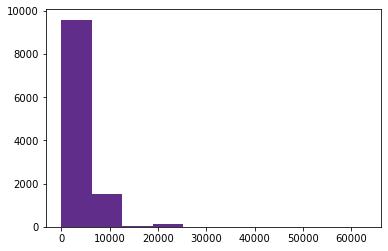

In [64]:
plt.hist(df_tp['VALOR_PAQUETES'], color='#612D8A', alpha=1)
plt.show()

In [66]:
df_fp=resultado[(resultado['RECARGO'] ==0) & (resultado['PREDICCION']==1) ]

In [67]:
df_fp

,SUBSCRIBER_ID,PERIODO,DIA_RECARGA,FECHA_PRED,PREDICCION,PROBABILIDAD,VALOR_CARGA,RANGO_PREDICHO,RN,TOTAL_RECARGAS,VALOR_RECARGAS,PROMEDIO_RECARGA,RECARGO,PAQUETE_NOMBRE,TOTAL_PAQUETES,VALOR_PAQUETES,PAQUETE,PROX_RECARGA,MONTO_PROX,DIAS_ENTRE_RECARGAS
4,1112632454,202212,2022-12-01,2022-12-07,1,74,1000.0,2022-12-11,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1995-07-31 09:42:37.666016,0.0,-9991
7,1112634102,202211,2022-11-24,2022-11-30,1,59,5500.0,2022-12-04,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,2022-12-04 14:46:58.000000,5500.0,4
11,1112634501,202212,2022-11-27,2022-12-03,1,56,5500.0,2022-12-07,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,2022-12-14 15:19:50.000000,5500.0,11
12,1112634861,202212,2022-11-27,2022-12-03,1,67,5500.0,2022-12-07,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1995-07-31 09:42:37.666016,0.0,-9987
26,1112639940,202212,2022-11-28,2022-12-04,1,71,5500.0,2022-12-08,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,2022-12-08 10:05:00.000000,5500.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,1302843997,202212,2022-11-30,2022-12-06,1,80,5500.0,2022-12-10,3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,2022-12-11 15:20:07.000000,5500.0,5
595,1310001559,202212,2022-11-30,2022-12-06,1,53,5500.0,2022-12-10,3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,2022-12-12 09:28:15.000000,3500.0,6
611,1318517294,202212,2022-12-01,2022-12-07,1,87,5500.0,2022-12-11,3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,2022-12-11 17:32:40.000000,5500.0,4
620,1324930094,202212,2022-12-01,2022-12-07,1,80,5500.0,2022-12-11,3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1995-07-31 09:42:37.666016,0.0,-9991


In [77]:
df_fp.groupby('DIAS_ENTRE_RECARGAS').count()

,SUBSCRIBER_ID,PERIODO,DIA_RECARGA,FECHA_PRED,PREDICCION,PROBABILIDAD,VALOR_CARGA,RANGO_PREDICHO,RN,TOTAL_RECARGAS,VALOR_RECARGAS,PROMEDIO_RECARGA,RECARGO,PAQUETE_NOMBRE,TOTAL_PAQUETES,VALOR_PAQUETES,PAQUETE,PROX_RECARGA,MONTO_PROX
DIAS_ENTRE_RECARGAS,,,,,,,,,,,,,,,,,,,
-9991,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851
-9990,849,849,849,849,849,849,849,849,849,849,849,849,849,849,849,849,849,849,849
-9989,698,698,698,698,698,698,698,698,698,698,698,698,698,698,698,698,698,698,698
-9988,762,762,762,762,762,762,762,762,762,762,762,762,762,762,762,762,762,762,762
-9987,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588
-9986,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693
-9985,643,643,643,643,643,643,643,643,643,643,643,643,643,643,643,643,643,643,643
-9984,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603
-9983,624,624,624,624,624,624,624,624,624,624,624,624,624,624,624,624,624,624,624


In [74]:
dias_entre_recargas=df_fp[df_fp['DIAS_ENTRE_RECARGAS'] >=0]

In [78]:
dias_entre_recargas.count()/df_fp.count()

SUBSCRIBER_ID          0.497463
PERIODO                0.497463
DIA_RECARGA            0.497463
FECHA_PRED             0.497463
PREDICCION             0.497463
PROBABILIDAD           0.497463
VALOR_CARGA            0.497463
RANGO_PREDICHO         0.497463
RN                     0.497463
TOTAL_RECARGAS         0.497463
VALOR_RECARGAS         0.497463
PROMEDIO_RECARGA       0.497463
RECARGO                0.497463
PAQUETE_NOMBRE         0.497463
TOTAL_PAQUETES         0.497463
VALOR_PAQUETES         0.497463
PAQUETE                0.497463
PROX_RECARGA           0.497463
MONTO_PROX             0.497463
DIAS_ENTRE_RECARGAS    0.497463
dtype: float64

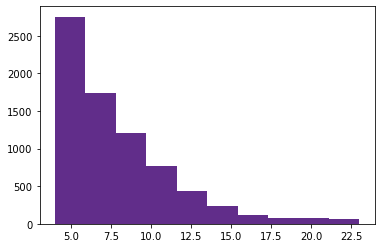

In [76]:

plt.hist(dias_entre_recargas['DIAS_ENTRE_RECARGAS'], color='#612D8A', alpha=1)
plt.show()

df_tn


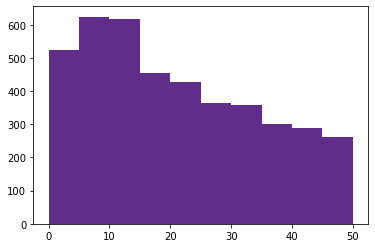

df_fn


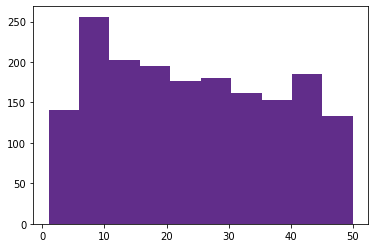

df_tp


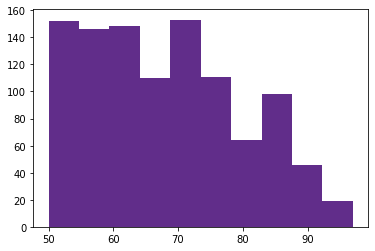

df_fp


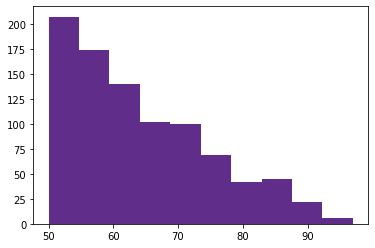

In [10]:
print('df_tn')
plt.hist(df_tn['PROBABILIDAD'], color='#612D8A', alpha=1)
plt.show()
print('df_fn')
plt.hist(df_fn['PROBABILIDAD'], color='#612D8A', alpha=1)
plt.show()
print('df_tp')
plt.hist(df_tp['PROBABILIDAD'], color='#612D8A', alpha=1)
plt.show()
print('df_fp')
plt.hist(df_fp['PROBABILIDAD'], color='#612D8A', alpha=1)
plt.show()

In [32]:
# analisis del modelo para las campanias de mensajes de texto
#primero coger los resultados del modelo y hacer los filtros por dia
periodo_proceso_codigo=20230216

In [33]:
query=f'''
SELECT A.*,
       CASE
            WHEN A.VALOR_CARGA=1000 THEN '1000'
            WHEN A.VALOR_CARGA>1000 AND A.VALOR_CARGA<5000 THEN '1001-4999'
            WHEN A.VALOR_CARGA=5000 THEN '5000'
            WHEN A.VALOR_CARGA>5000 AND A.VALOR_CARGA<10000 THEN '5001-9999'
            WHEN A.VALOR_CARGA=10000 THEN '10000'
            WHEN A.VALOR_CARGA>10000 THEN 'MAYOR 10000'
       END AS RANGO_CICLO_ANTERIOR
FROM AGG_DL_PJ_TOPUPS A
WHERE FECHA_PRED='{periodo_proceso_codigo}'
AND A.MODELO_VERSION='V2.1'
'''
base=cst.consulta(query)

c:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [7]:
base

,SUBSCRIBER_ID,PERIODO_PROCESO_CODIGO,FECHA_PRED,PREDICCION,PROBABILIDAD,VALOR_CARGA,MODELO_VERSION,CICLOS,DIAS_PAQ_VENCIDO,RANGO_CICLO_ANTERIOR
0,1230983169,202302,20230214,0,14,3500,V2.1,6,31,1001-4999
1,1230983311,202302,20230214,0,33,10000,V2.1,4,0,10000
2,1230983354,202302,20230214,0,30,3500,V2.1,3,17,1001-4999
3,1230983467,202302,20230214,0,9,5500,V2.1,0,-3,5001-9999
4,1230983487,202302,20230214,0,5,5500,V2.1,2,7,5001-9999
...,...,...,...,...,...,...,...,...,...,...
41493,2290562616,202302,20230214,0,5,21000,V2.1,2,-15,MAYOR 10000
41494,2290565875,202302,20230214,0,20,5500,V2.1,2,7,5001-9999
41495,2290618397,202302,20230214,0,30,3500,V2.1,3,17,1001-4999
41496,2290677519,202302,20230214,0,25,5500,V2.1,1,16,5001-9999


In [34]:
query=f'''
SELECT A.SUBSCRIBER_ID,
       COUNT(*) AS TOTAL_RECARGAS,
       SUM(A.VALOR_CARGA) AS VALOR_RECARGAS,
       SUM(A.VALOR_CARGA)/COUNT(*) AS PROMEDIO_RECARGA,
       1 AS RECARGO
FROM DWH_BODEGA_WOM.FCT_RECARGAS A 
RIGHT JOIN (SELECT * 
FROM AGG_DL_PJ_TOPUPS
WHERE FECHA_PRED='{periodo_proceso_codigo}'
AND MODELO_VERSION='V2.1') B ON A.SUBSCRIBER_ID=B.SUBSCRIBER_ID
WHERE A.TIEMPO_RECARGA_DK BETWEEN B.FECHA_PRED AND B.FECHA_PRED+5
GROUP BY A.SUBSCRIBER_ID
'''
recargas=cst.consulta(query)

c:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [10]:
recargas

,SUBSCRIBER_ID,TOTAL_RECARGAS,VALOR_RECARGAS,PROMEDIO_RECARGA,RECARGO
0,1240477841,1,3500,3500.0,1
1,1175741921,1,5500,5500.0,1
2,1113050691,1,5500,5500.0,1
3,1192050616,1,7500,7500.0,1
4,1240500316,2,9000,4500.0,1
...,...,...,...,...,...
10244,1195476567,1,7500,7500.0,1
10245,1238371466,1,13000,13000.0,1
10246,1219942633,1,5500,5500.0,1
10247,1131769061,1,3500,3500.0,1


In [35]:
query=f'''SELECT DISTINCT(A.SUBSCRIBER_ID) AS SUBSCRIBER_ID,
       A.PAQUETE_NOMBRE,
       COUNT(*) AS TOTAL_PAQUETES,
       SUM(A.VALOR) AS VALOR_PAQUETES,
       1 AS PAQUETE
FROM DWH_BODEGA_WOM.FCT_PAQUETES A 
RIGHT JOIN (SELECT * 
FROM AGG_DL_PJ_TOPUPS
WHERE FECHA_PRED='{periodo_proceso_codigo}'
AND MODELO_VERSION='V2.1') B ON A.SUBSCRIBER_ID=B.SUBSCRIBER_ID
WHERE A.TIEMPO_PAQUETE_DK BETWEEN B.FECHA_PRED AND B.FECHA_PRED+5
GROUP BY A.SUBSCRIBER_ID,A.PAQUETE_NOMBRE
'''
paquetes=cst.consulta(query)

c:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [12]:
paquetes

,SUBSCRIBER_ID,PAQUETE_NOMBRE,TOTAL_PAQUETES,VALOR_PAQUETES,PAQUETE
0,1178944470,MIXTO_Paquete 1D _60MB,1,1500.0,1
1,1281657854,MIXTO_Paquete 7D _1.5GB,1,5500.0,1
2,1192056812,MIXTO_Paquete 3D _500MB,1,3500.0,1
3,1190927172,MIXTO_Paquete 3D _500MB,1,3500.0,1
4,1276201024,MIXTO_Paquete 3D _500MB,2,7000.0,1
...,...,...,...,...,...
10280,1259069347,MIXTO_Paquete 7D _1.5GB,1,5500.0,1
10281,1256503480,MIXTO_Paquete 15D _4GB,1,11000.0,1
10282,1259071884,MIXTO_Paquete 7D _1.5GB,1,5500.0,1
10283,1116313334,MIXTO_Paquete 1D _60MB,1,1500.0,1


In [36]:
df_general=base.merge(recargas,left_on='SUBSCRIBER_ID',right_on='SUBSCRIBER_ID',how='left')

In [37]:
df_general=df_general.fillna(0)

In [38]:
df_general=df_general.merge(paquetes,left_on='SUBSCRIBER_ID',right_on='SUBSCRIBER_ID',how='left')

In [16]:
df_general.to_excel('14febtopupsv2.xlsx')

In [17]:
df_general

,SUBSCRIBER_ID,PERIODO_PROCESO_CODIGO,FECHA_PRED,PREDICCION,PROBABILIDAD,VALOR_CARGA,MODELO_VERSION,CICLOS,DIAS_PAQ_VENCIDO,RANGO_CICLO_ANTERIOR,TOTAL_RECARGAS,VALOR_RECARGAS,PROMEDIO_RECARGA,RECARGO,PAQUETE_NOMBRE,TOTAL_PAQUETES,VALOR_PAQUETES,PAQUETE
0,1230983169,202302,20230214,0,14,3500,V2.1,6,31,1001-4999,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,1230983311,202302,20230214,0,33,10000,V2.1,4,0,10000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,1230983354,202302,20230214,0,30,3500,V2.1,3,17,1001-4999,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,1230983467,202302,20230214,0,9,5500,V2.1,0,-3,5001-9999,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,1230983487,202302,20230214,0,5,5500,V2.1,2,7,5001-9999,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42033,2290562616,202302,20230214,0,5,21000,V2.1,2,-15,MAYOR 10000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
42034,2290565875,202302,20230214,0,20,5500,V2.1,2,7,5001-9999,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
42035,2290618397,202302,20230214,0,30,3500,V2.1,3,17,1001-4999,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
42036,2290677519,202302,20230214,0,25,5500,V2.1,1,16,5001-9999,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [72]:
df_general['MC']=np.where(((df_general['RECARGO'] ==1) & (df_general['PREDICCION']==0)),
        'fn',
        np.where((df_general['RECARGO'] ==1) & (df_general['PREDICCION']==1)),'tp',
        np.where((df_general['RECARGO'] ==0) & (df_general['PREDICCION']==1)),'fp',
        np.where((df_general['RECARGO'] ==0) & (df_general['PREDICCION']==0)),'tn','error'
        )

TypeError: where() takes from 1 to 3 positional arguments but 9 were given

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [39]:
y_test=df_general['RECARGO']
y_pred=df_general['PREDICCION']

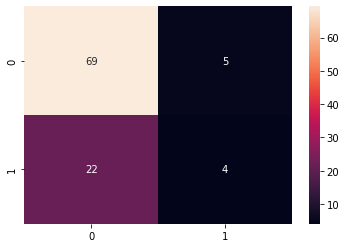

In [21]:
sns.heatmap(confusion_matrix(y_test, y_pred)/len(y_test)*100, annot=True)
plt.show()
#14 febrero

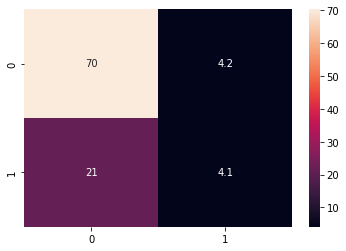

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred)/len(y_test)*100, annot=True)
plt.show()
#15feb

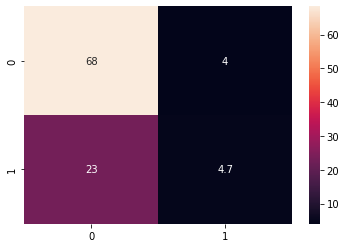

In [40]:
sns.heatmap(confusion_matrix(y_test, y_pred)/len(y_test)*100, annot=True)
plt.show()
#16 feb


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.93      0.84     31260
         1.0       0.45      0.16      0.23     10778

    accuracy                           0.73     42038
   macro avg       0.61      0.55      0.54     42038
weighted avg       0.68      0.73      0.68     42038



In [41]:
df_fn=df_general[(df_general['RECARGO'] ==1) & (df_general['PREDICCION']==0) ]

In [22]:
df_tp=df_general[(df_general['RECARGO'] ==1) & (df_general['PREDICCION']==1) ]

In [42]:
len(df_fn)

10586

In [67]:
df_tp.groupby('TOTAL_RECARGAS').count()

,SUBSCRIBER_ID,PERIODO_PROCESO_CODIGO,FECHA_ALTA,FECHA_PRED,PREDICCION,PROBABILIDAD,VALOR_CARGA,VALOR_RECARGAS,PROMEDIO_RECARGA,RECARGO
TOTAL_RECARGAS,,,,,,,,,,
1.0,1028,1028,1028,1028,1028,1028,1028,1028,1028,1028
2.0,124,124,124,124,124,124,124,124,124,124
3.0,11,11,11,11,11,11,11,11,11,11
4.0,3,3,3,3,3,3,3,3,3,3
5.0,1,1,1,1,1,1,1,1,1,1


In [68]:
df_tp.groupby(['TOTAL_RECARGAS','VALOR_RECARGAS']).count()

SUBSCRIBER_ID  PERIODO_PROCESO_CODIGO  \
TOTAL_RECARGAS VALOR_RECARGAS                                          
1.0            1000.0                     13                      13   
               1500.0                      2                       2   
               2000.0                     13                      13   
               2300.0                      1                       1   
               3000.0                      4                       4   
               3500.0                    155                     155   
               4000.0                      3                       3   
               4622.0                      1                       1   
               5000.0                     12                      12   
               5500.0                    636                     636   
               6000.0                     11                      11   
               7000.0                      5                       5   
               7500.0                     88                      88   
               10000.0                     7                       7   
               11000.0                    51                      51   
               13000.0                     3                       3   
               20000.0                     2                       2   
               21000.0                    20                      20   
               43000.0                     1                       1   
2.0            2000.0                      2                       2   
               3500.0                      1                       1   
               5000.0                      1                       1   
               5500.0                      2                       2   
               6000.0                      3                       3   
               6500.0                      1                       1   
               7000.0                     22                      22   
               8000.0                      1                       1   
               8500.0                      1                       1   
               9000.0                     24                      24   
               9500.0                      1                       1   
               10000.0                     1                       1   
               10500.0                     4                       4   
               11000.0                    44                      44   
               12000.0                     2                       2   
               12500.0                     1                       1   
               13000.0                     5                       5   
               14000.0                     1                       1   
               16500.0                     2                       2   
               17500.0                     1                       1   
               21000.0                     2                       2   
               22000.0                     1                       1   
               30000.0                     1                       1   
3.0            5500.0                      1                       1   
               8000.0                      1                       1   
               9000.0                      1                       1   
               10000.0                     1                       1   
               11000.0                     1                       1   
               12000.0                     1                       1   
               13000.0                     1                       1   
               16500.0                     3                       3   
               22000.0                     1                       1   
4.0            4000.0                      1                       1   
               8490.0                      1                       1   
               15500.0                     1                       1   

In [43]:
df_fn_1=df_fn[(df_fn['TOTAL_RECARGAS'] ==1)]

In [44]:
df_fn_1.groupby('PROMEDIO_RECARGA').count()

,SUBSCRIBER_ID,PERIODO_PROCESO_CODIGO,FECHA_PRED,PREDICCION,PROBABILIDAD,VALOR_CARGA,MODELO_VERSION,CICLOS,DIAS_PAQ_VENCIDO,RANGO_CICLO_ANTERIOR,TOTAL_RECARGAS,VALOR_RECARGAS,RECARGO,PAQUETE_NOMBRE,TOTAL_PAQUETES,VALOR_PAQUETES,PAQUETE
PROMEDIO_RECARGA,,,,,,,,,,,,,,,,,
1000.0,168,168,168,168,168,168,168,168,168,168,168,168,168,52,52,48,52
1500.0,6,6,6,6,6,6,6,6,6,6,6,6,6,4,4,4,4
2000.0,282,282,282,282,282,282,282,282,282,282,282,282,282,108,108,105,108
2500.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2
3000.0,135,135,135,135,135,135,135,135,135,135,135,135,135,65,65,62,65
3500.0,1816,1816,1816,1816,1816,1816,1816,1816,1816,1816,1816,1816,1816,1815,1815,1798,1815
4000.0,63,63,63,63,63,63,63,63,63,63,63,63,63,41,41,41,41
4616.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4622.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


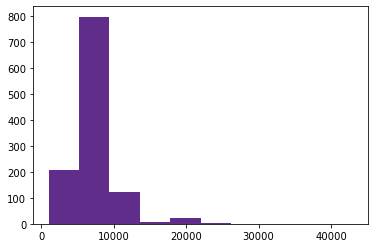

In [69]:
plt.hist(df_tp['VALOR_RECARGAS'], color='#612D8A', alpha=1)
plt.show()

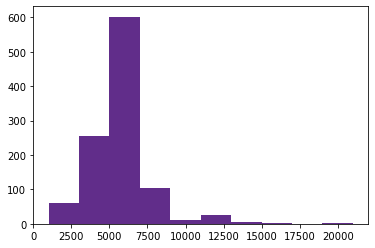

In [73]:
plt.hist(df_fp['VALOR_CARGA'], color='#612D8A', alpha=1)
plt.show()

In [58]:
df_fp=df_general[(df_general['RECARGO'] ==0) & (df_general['PREDICCION']==1) ]

In [11]:
#ANALISIS PARA NOVIEMBRE DE QUIENES INICIAN CICLO 
base_entreno=pd.read_csv('base_entreno.csv', sep=',')
trafico_voz=pd.read_csv('trafico_voz.csv', sep=',')
trafico_datos=pd.read_csv('trafico_datos.csv', sep=',')
paquetes_dur=pd.read_csv('paquetes_dur.csv', sep=',')
var_y=pd.read_csv('var_y.csv', sep=',')
trafico_datos['SUBSCRIBER_ID'] = trafico_datos['SUBSCRIBER_ID'].astype('int64')
trafico_voz['SUBSCRIBER_ID'] = trafico_voz['SUBSCRIBER_ID'].astype('int64')
df_insumos=base_entreno.merge(trafico_voz,left_on='SUBSCRIBER_ID',right_on='SUBSCRIBER_ID',how='left')
df_insumos=df_insumos.merge(trafico_datos,left_on='SUBSCRIBER_ID',right_on='SUBSCRIBER_ID',how='left')
df_insumos=df_insumos.merge(paquetes_dur,left_on='SUBSCRIBER_ID',right_on='SUBSCRIBER_ID',how='left')
df_insumos=df_insumos.merge(var_y,left_on='SUBSCRIBER_ID',right_on='SUBSCRIBER_ID',how='left')

C:\Users\HP EliteBook 840 G3\AppData\Local\Temp\ipykernel_5420\2116252914.py:11: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_insumos=df_insumos.merge(paquetes_dur,left_on='SUBSCRIBER_ID',right_on='SUBSCRIBER_ID',how='left')


In [12]:
df_insumos=df_insumos.fillna(0)

In [13]:
import pickle
X_prueba1=df_insumos[['VALOR_ULTIMA_RECARGA','GROSS_PERMA','CICLOS', 'CANTIDAD_LLAMADAS', 'DURACION_LLAMADAS',
       'DIAS_LLAMADAS', 'MB_CONSUMIDAS', 'DIAS_NAV','DIAS_VENCIDO']]

In [14]:
model = pickle.load(open("model_topups_v2.pkl", "rb"))
prediction = pd.DataFrame(model.predict(X_prueba1))
prediction.columns = ['PREDICCION']
Y_prob=model.predict_proba(X_prueba1)
prediction_prob = pd.DataFrame(model.predict_proba(X_prueba1))
prediction_prob.columns = ['PROBABILIDAD_0', 'PROBABILIDAD_1']
Y_prob=Y_prob[[1]]
Y_prob=Y_prob*100

In [15]:
df_general=df_insumos.join(prediction,how='left')

In [16]:
df_general=df_general.join(prediction_prob,how='left')

In [17]:
df_general

,Unnamed: 0_x,MOVIMIENTO_NOMBRE,SUBSCRIBER_ID,TIEMPO_ULTIMA_RECARGA,VALOR_ULTIMA_RECARGA,ULTIMA_RECARGA,GROSS_PERMA,INICIO_CICLO,FECHA_PRED,CICLOS,...,PAQUETE_NOMBRE,"COALESCE(B.DURACION,3)",FECHA_VENCE,RN,DIAS_VENCIDO,Unnamed: 0,RECARGO,PREDICCION,PROBABILIDAD_0,PROBABILIDAD_1
0,0,PERMANECE,192554318,20221125,5500,2022-11-25 08:40:27,0,20221205,20221210,2,...,MIXTO_Paquete 30D _9GB,30.0,2022-11-23 09:59:58,1.0,17.0,80921.0,1.0,0.0,0.540000,0.460000
1,1,PERMANECE,192561164,20221130,43000,2022-11-30 20:06:03,0,20221205,20221210,1,...,MIXTO_Paquete 30D _9GB,30.0,2022-11-26 18:44:29,1.0,13.0,0.0,0.0,0.0,0.920000,0.080000
2,2,PERMANECE,192579830,20221130,11000,2022-11-30 16:21:45,0,20221205,20221210,1,...,MIXTO_Paquete 15D _4GB,15.0,2022-12-15 16:21:43,1.0,-6.0,0.0,0.0,0.0,0.870000,0.130000
3,3,PERMANECE,1112633351,20221205,5500,2022-12-05 13:08:02,0,20221205,20221210,0,...,MIXTO_Paquete 7D _1.5GB,7.0,2022-12-12 13:08:02,1.0,-3.0,104618.0,1.0,1.0,0.320000,0.680000
4,4,PERMANECE,1112633973,20221115,3500,2022-11-15 05:35:51,0,20221205,20221210,4,...,MIXTO_Paquete 3D _500MB,3.0,2022-11-18 05:35:50,1.0,22.0,0.0,0.0,0.0,0.972306,0.027694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34354,34354,ACTIVACION,2331966366,20221130,10000,2022-11-30 18:12:18,1,20221205,20221210,1,...,MIXTO_Paquete 7D _1.5GB,7.0,2022-12-11 21:46:13,1.0,-2.0,117435.0,1.0,0.0,0.530000,0.470000
34355,34355,ACTIVACION,2332105167,20221205,3500,2022-12-05 13:45:21,1,20221205,20221210,0,...,Paquete Datos 3D,3.0,2022-12-08 13:45:21,1.0,1.0,0.0,0.0,0.0,0.810000,0.190000
34356,34356,ACTIVACION,2332257832,20221205,3500,2022-12-05 18:07:33,1,20221205,20221210,0,...,MIXTO_Paquete 3D _500MB,3.0,2022-12-08 18:07:33,1.0,1.0,0.0,0.0,0.0,0.810000,0.190000
34357,34357,PERMANECE,2335532593,20221130,20000,2022-11-30 09:00:56,0,20221205,20221210,1,...,Paquete Datos 30D,30.0,2022-12-30 09:01:42,1.0,-20.0,0.0,0.0,0.0,0.930000,0.070000


In [40]:
df_general['PROBABILIDAD_1']=df_general['PROBABILIDAD_1']*100

In [42]:
df_general

,Unnamed: 0_x,MOVIMIENTO_NOMBRE,SUBSCRIBER_ID,TIEMPO_ULTIMA_RECARGA,VALOR_ULTIMA_RECARGA,ULTIMA_RECARGA,GROSS_PERMA,INICIO_CICLO,FECHA_PRED,CICLOS,Unnamed: 0_y,CANTIDAD_LLAMADAS,DURACION_LLAMADAS,DIAS_LLAMADAS,Unnamed: 0_x,MB_CONSUMIDAS,DIAS_NAV,Unnamed: 0_y,FECHA_RECARGA,PAQUETE_NOMBRE,"COALESCE(B.DURACION,3)",FECHA_VENCE,RN,DIAS_VENCIDO,Unnamed: 0,RECARGO,PREDICCION,PROBABILIDAD_0,PROBABILIDAD_1
0,0,PERMANECE,192554318,20221125,5500,2022-11-25 08:40:27,0,20221205,20221210,2,342463.0,24.0,4778.0,5.0,382370.0,213.0,5.0,5.0,2022-10-24 09:59:58,MIXTO_Paquete 30D _9GB,30.0,2022-11-23 09:59:58,1.0,17.0,80921.0,1.0,0.0,0.540000,46.000000
1,1,PERMANECE,192561164,20221130,43000,2022-11-30 20:06:03,0,20221205,20221210,1,159426.0,9.0,930.0,4.0,286927.0,340.0,5.0,60.0,2022-10-27 18:44:29,MIXTO_Paquete 30D _9GB,30.0,2022-11-26 18:44:29,1.0,13.0,0.0,0.0,0.0,0.920000,8.000000
2,2,PERMANECE,192579830,20221130,11000,2022-11-30 16:21:45,0,20221205,20221210,1,259790.0,2.0,353.0,2.0,134255.0,1072.0,5.0,122.0,2022-11-30 16:21:43,MIXTO_Paquete 15D _4GB,15.0,2022-12-15 16:21:43,1.0,-6.0,0.0,0.0,0.0,0.870000,13.000000
3,3,PERMANECE,1112633351,20221205,5500,2022-12-05 13:08:02,0,20221205,20221210,0,148832.0,17.0,7386.0,5.0,79401.0,142.0,5.0,864.0,2022-12-05 13:08:02,MIXTO_Paquete 7D _1.5GB,7.0,2022-12-12 13:08:02,1.0,-3.0,104618.0,1.0,1.0,0.320000,68.000000
4,4,PERMANECE,1112633973,20221115,3500,2022-11-15 05:35:51,0,20221205,20221210,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1104.0,2022-11-15 05:35:50,MIXTO_Paquete 3D _500MB,3.0,2022-11-18 05:35:50,1.0,22.0,0.0,0.0,0.0,0.972306,2.769401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34354,34354,ACTIVACION,2331966366,20221130,10000,2022-11-30 18:12:18,1,20221205,20221210,1,326700.0,23.0,1803.0,4.0,167972.0,2430.0,5.0,1536247.0,2022-12-04 21:46:13,MIXTO_Paquete 7D _1.5GB,7.0,2022-12-11 21:46:13,1.0,-2.0,117435.0,1.0,0.0,0.530000,47.000000
34355,34355,ACTIVACION,2332105167,20221205,3500,2022-12-05 13:45:21,1,20221205,20221210,0,0.0,0.0,0.0,0.0,250663.0,175.0,5.0,1536253.0,2022-12-05 13:45:21,Paquete Datos 3D,3.0,2022-12-08 13:45:21,1.0,1.0,0.0,0.0,0.0,0.810000,19.000000
34356,34356,ACTIVACION,2332257832,20221205,3500,2022-12-05 18:07:33,1,20221205,20221210,0,167166.0,15.0,773.0,2.0,88863.0,1652.0,3.0,1536254.0,2022-12-05 18:07:33,MIXTO_Paquete 3D _500MB,3.0,2022-12-08 18:07:33,1.0,1.0,0.0,0.0,0.0,0.810000,19.000000
34357,34357,PERMANECE,2335532593,20221130,20000,2022-11-30 09:00:56,0,20221205,20221210,1,132123.0,25.0,422.0,4.0,275819.0,382.0,4.0,1536260.0,2022-11-30 09:01:42,Paquete Datos 30D,30.0,2022-12-30 09:01:42,1.0,-20.0,0.0,0.0,0.0,0.930000,7.000000


In [43]:
df_tn=df_general[(df_general['RECARGO'] ==0) & (df_general['PREDICCION']==0) & (df_general['CICLOS']==0)]
df_fn=df_general[(df_general['RECARGO'] ==1) & (df_general['PREDICCION']==0) & (df_general['CICLOS']==0) ]
df_tp=df_general[(df_general['RECARGO'] ==1) & (df_general['PREDICCION']==1) & (df_general['CICLOS']==0)]
df_fp=df_general[(df_general['RECARGO'] ==0) & (df_general['PREDICCION']==1) & (df_general['CICLOS']==0)]


In [29]:
df_tn=df_general[(df_general['RECARGO'] ==0) & (df_general['PREDICCION']==0)]
df_fn=df_general[(df_general['RECARGO'] ==1) & (df_general['PREDICCION']==0)]
df_tp=df_general[(df_general['RECARGO'] ==1) & (df_general['PREDICCION']==1)]
df_fp=df_general[(df_general['RECARGO'] ==0) & (df_general['PREDICCION']==1)]


df_tn


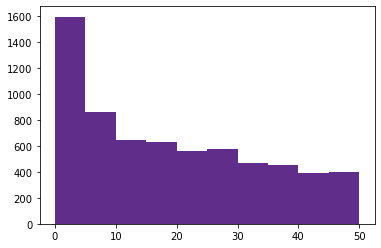

df_fn


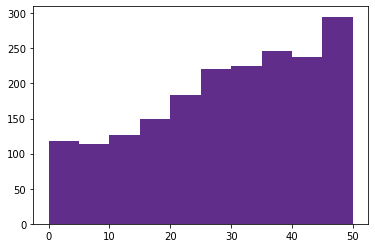

df_tp


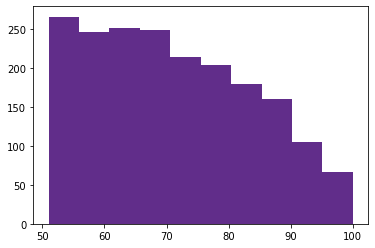

df_fp


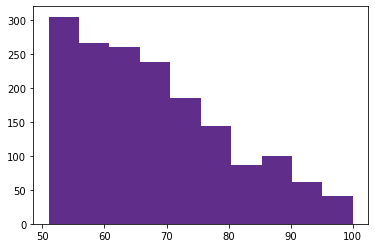

In [44]:
print('df_tn')
plt.hist(df_tn['PROBABILIDAD_1'], color='#612D8A', alpha=1)
plt.show()
print('df_fn')
plt.hist(df_fn['PROBABILIDAD_1'], color='#612D8A', alpha=1)
plt.show()
print('df_tp')
plt.hist(df_tp['PROBABILIDAD_1'], color='#612D8A', alpha=1)
plt.show()
print('df_fp')
plt.hist(df_fp['PROBABILIDAD_1'], color='#612D8A', alpha=1)
plt.show()

In [31]:
df_fp_1=df_fp[(df_fp['PROBABILIDAD_1'] ==1)]

In [27]:
pd.options.display.max_columns = False

In [34]:
df_fp_1

,Unnamed: 0_x,MOVIMIENTO_NOMBRE,SUBSCRIBER_ID,TIEMPO_ULTIMA_RECARGA,VALOR_ULTIMA_RECARGA,ULTIMA_RECARGA,GROSS_PERMA,INICIO_CICLO,FECHA_PRED,CICLOS,Unnamed: 0_y,CANTIDAD_LLAMADAS,DURACION_LLAMADAS,DIAS_LLAMADAS,Unnamed: 0_x,MB_CONSUMIDAS,DIAS_NAV,Unnamed: 0_y,FECHA_RECARGA,PAQUETE_NOMBRE,"COALESCE(B.DURACION,3)",FECHA_VENCE,RN,DIAS_VENCIDO,Unnamed: 0,RECARGO,PREDICCION,PROBABILIDAD_0,PROBABILIDAD_1
177,177,PERMANECE,1112983982,20221205,5500,2022-12-05 14:51:30,0,20221205,20221210,0,0.0,0.0,0.0,0.0,289163.0,1729.0,5.0,57473.0,2022-12-05 14:51:30,MIXTO_Paquete 7D _1.5GB,7.0,2022-12-12 14:51:30,1.0,-3.0,0.0,0.0,1.0,0.0,1.0
2260,2260,PERMANECE,1151023775,20221130,5500,2022-11-30 17:23:39,0,20221205,20221210,1,0.0,0.0,0.0,0.0,347616.0,1029.0,5.0,470317.0,2022-11-30 17:23:38,MIXTO_Paquete 7D _1.5GB,7.0,2022-12-07 17:23:38,1.0,2.0,0.0,0.0,1.0,0.0,1.0
6147,6147,PERMANECE,1189560992,20221205,5500,2022-12-05 09:57:53,0,20221205,20221210,0,151948.0,66.0,8349.0,5.0,87396.0,2378.0,5.0,775219.0,2022-12-05 09:57:52,MIXTO_Paquete 7D _1.5GB,7.0,2022-12-12 09:57:52,1.0,-2.0,0.0,0.0,1.0,0.0,1.0
6409,6409,PERMANECE,1192053841,20221205,5500,2022-12-05 13:09:01,0,20221205,20221210,0,0.0,0.0,0.0,0.0,269557.0,2571.0,5.0,791551.0,2022-12-05 13:09:00,MIXTO_Paquete 7D _1.5GB,7.0,2022-12-12 13:09:00,1.0,-3.0,0.0,0.0,1.0,0.0,1.0
7343,7343,PERMANECE,1200772671,20221205,3500,2022-12-05 15:00:16,0,20221205,20221210,0,0.0,0.0,0.0,0.0,121598.0,856.0,5.0,844385.0,2022-12-05 15:00:15,MIXTO_Paquete 3D _500MB,3.0,2022-12-08 15:00:15,1.0,1.0,0.0,0.0,1.0,0.0,1.0
8668,8668,PERMANECE,1209809412,20221205,3500,2022-12-05 17:33:09,0,20221205,20221210,0,0.0,0.0,0.0,0.0,296825.0,1626.0,5.0,900730.0,2022-12-05 17:33:09,MIXTO_Paquete 3D _500MB,3.0,2022-12-08 17:33:09,1.0,1.0,0.0,0.0,1.0,0.0,1.0
9693,9693,PERMANECE,1215972465,20221205,5500,2022-12-05 17:45:04,0,20221205,20221210,0,0.0,0.0,0.0,0.0,35112.0,10811.0,5.0,938550.0,2022-12-05 17:45:03,MIXTO_Paquete 7D _1.5GB,7.0,2022-12-12 17:45:03,1.0,-3.0,0.0,0.0,1.0,0.0,1.0
11742,11742,PERMANECE,1226401872,20221130,3500,2022-11-30 22:52:50,0,20221205,20221210,1,0.0,0.0,0.0,0.0,19709.0,41.0,5.0,1007432.0,2022-11-30 22:52:49,MIXTO_Paquete 3D _500MB,3.0,2022-12-03 22:52:49,1.0,6.0,0.0,0.0,1.0,0.0,1.0
11773,11773,PERMANECE,1226554912,20221205,5500,2022-12-05 18:24:07,0,20221205,20221210,0,0.0,0.0,0.0,0.0,400754.0,1744.0,5.0,1008402.0,2022-12-05 18:24:07,MIXTO_Paquete 7D _1.5GB,7.0,2022-12-12 18:24:07,1.0,-3.0,0.0,0.0,1.0,0.0,1.0
11802,11802,PERMANECE,1226562089,20221130,5500,2022-11-30 15:13:54,0,20221205,20221210,1,0.0,0.0,0.0,0.0,100078.0,1611.0,5.0,1010012.0,2022-11-30 15:13:53,MIXTO_Paquete 7D _1.5GB,7.0,2022-12-07 15:13:53,1.0,2.0,0.0,0.0,1.0,0.0,1.0
